In [1]:
from feos_dft import *
from feos_dft.si import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigma = ANGSTROM
func = FMTFunctional(np.array([sigma/ANGSTROM]), FMTVersion.WhiteBear)

# Adsorption isotherms

CPU times: user 5.22 s, sys: 0 ns, total: 5.22 s
Wall time: 5.22 s


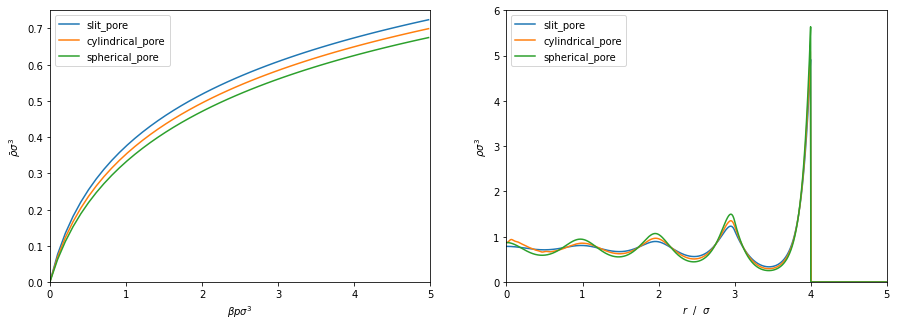

In [3]:
%%time
potential = ExternalPotential.HardWall(sigma/ANGSTROM)
pore_size = 5*sigma

pores = {'slit_pore': (Pore1D(func, Geometry.Cartesian, 2*pore_size, potential), pore_size-sigma/2),
         'cylindrical_pore': (Pore1D(func, Geometry.Cylindrical, pore_size, potential), np.pi*(pore_size-sigma/2)**2),
         'spherical_pore': (Pore1D(func, Geometry.Spherical, pore_size, potential), 4/3*np.pi*(pore_size-sigma/2)**3)}

f, ax = plt.subplots(1,2,figsize=(15,5))

for label, (pore, volume) in pores.items():
    pmax = State(func, KELVIN, density=0.75/(sigma**3*NAV)).pressure()
    isotherm = Adsorption1D.adsorption_isotherm(func, KELVIN, (1e-10*pmax, pmax, 50), pore)
    ax[0].plot(isotherm.pressure/(KB*KELVIN)*sigma**3, isotherm.total_adsorption/volume*sigma**3*NAV, label=label)
    
    profile = isotherm.profiles[-1]
    ax[1].plot(profile.r/sigma, (profile.density*sigma**3*NAV).T, label=label)

ax[0].axis([0,5,0,0.75])
ax[0].set_xlabel('$\\beta p\sigma^3$')
ax[0].set_ylabel('$\\bar\\rho\sigma^3$')
ax[0].legend()

ax[1].axis([0,5,0,6])
ax[1].set_xlabel('$r~~/~~\sigma$')
ax[1].set_ylabel('$\\rho\sigma^3$')
ax[1].legend();

# Pair correlation function

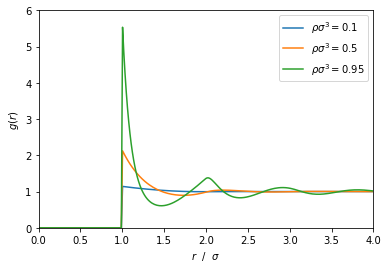

In [4]:
for density in [0.1,0.5,0.95]:
    bulk = State(func, KELVIN, density=density/(sigma**3*NAV))
    pair_correlation = PairCorrelation(bulk, 2048, 30*sigma).solve()

    plt.plot(pair_correlation.r/ANGSTROM, pair_correlation.pair_correlation_function.T, label=f'$\\rho\sigma^3={density}$')

plt.axis([0,4,0,6])
plt.xlabel('$r~~/~~\sigma$')
plt.ylabel('$g(r)$')
plt.legend();

# Density profiles of mixtures

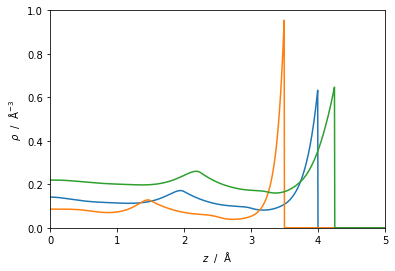

In [5]:
mix = FMTFunctional(np.array([1.0, 2.0, 0.5]), FMTVersion.WhiteBear)
bulk = State(mix, KELVIN, density=0.42/(ANGSTROM**3*NAV), molefracs=np.array([0.3,0.2,0.5]))
profile = Pore1D(mix, Geometry.Cartesian, 10*ANGSTROM, ExternalPotential.HardWall(1.0)).initialize(bulk).solve()
plt.plot(profile.z/ANGSTROM, (profile.density*ANGSTROM**3*NAV).T)

plt.axis([0,5,0,1])
plt.xlabel('$z~~/~~\mathrm{\AA}$')
plt.ylabel('$\\rho~~/~~\mathrm{\AA^{-3}}$');